<a href="https://colab.research.google.com/github/rydr0/Sat_Image_Dataset/blob/master/SatImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and EE Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from torchvision.transforms import ToTensor
from google.colab import drive
import os

from PIL import Image
from pprint import pprint
import ee
import folium

!pip install geehydro
import geehydro
!pip install geetools
from geetools import batch

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for geehydro: filename=geehydro-0.2.0-py2.py3-none-any.whl size=10114 sha256=34e47d12f7c90649bf2e832d3a3732b5dccadf9909005f9c3a5f99293449ec26
  Stored in directory: /root/.cache/pip/wheels/c5/07/67/5fa6e7271b46bbe0acafdc7105bbee27a39ab7132d251d822d
Successfully built geehydro
     |████████████████████████████████| 71kB 5.1MB/s 
     |████████████████████████████████| 225kB 13.2MB/s 
  Created wheel for geetools: filename=geetools-0.6.0-cp36-none-any.whl size=81650 sha256=faa94206407ddd7ad0038da0dc0ce38d5a5a3d5d796696006beef0d583ff883f
  Stored in directory: /root/.cache/pip/wheels/8b/0d/90/c214fd045df9bfc0e9f15dd5819ad4038fc90fab431e77da72
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32608 sha256=94fe888e80b4926939d309a69dbef2d79e6696aa94c8ee1da5a7b7bc44c28fe7
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built geetools pyshp


In [ ]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-s

# Earth Engine Authentication

In [ ]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=_NZSqrz0022vkfT78-mjqtHG0xwUjslsrKmdjJ9Fgws&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/3wGE4ISzsuyvWsnxKynBGMYuxbnw8HUyvYafNiiJjsHSPwuPeb47ivs

Successfully saved authorization token.


In [ ]:
ee.Initialize()

# Linking Google Drive

In [ ]:
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
os.chdir("gdrive/My Drive/Dissertation Files")
os.listdir()

['UK_workday_population_2011_1_km.asc',
 'UK_residential_population_2011_1_km.asc',
 'Manchester Area Vector.dbf',
 'Manchester Area Vector.shx',
 'Manchester Area Vector.shp',
 'Manchester Area Vector.cpg',
 'Manchester Area Vector.prj',
 'Manchester Area Vector.fix',
 'Manchester Area clipped.tif.aux.xml',
 'Labels',
 'Python',
 'sat_images_sat_images_864.pt',
 'sat_images_sat_images_1080.pt',
 'Manchester Area Vector.gpkg',
 '.ipynb_checkpoints',
 'Export',
 'tmp5oish4oz',
 'Models',
 'Exported Figures',
 'UK_residential_population_2011_1_km - 9999 to 0.asc']

# Exploring Census Population Data

In [ ]:
UKPopData = np.loadtxt("UK_residential_population_2011_1_km - 9999 to 0.asc", skiprows=6)

In [ ]:
UKPopData_df = pd.DataFrame(data=UKPopData.flatten())
#UKPopData_df[UKPopData_df == -9999] = 0

In [ ]:
UKPopData_df.describe(percentiles=[0.9, 0.99, 0.995, 0.999])

,0
count,789572.000000
mean,80.024149
std,536.360318
min,0.000000
50%,0.000000
90%,28.000000
99%,2652.000000
99.5%,3968.145000
99.9%,6726.858000
max,22620.000000


In [ ]:
UKPopData_df.count()

0    789572
dtype: int64

In [ ]:
UKPopData_df[UKPopData_df==0].count()

0    664322
dtype: int64

In [ ]:
UKPopData_df[UKPopData_df>0][0].value_counts(bins=20, sort=False)

(-21.62, 1131.95]      109608
(1131.95, 2262.9]        6257
(2262.9, 3393.85]        3894
(3393.85, 4524.8]        2688
(4524.8, 5655.75]        1422
(5655.75, 6786.7]         605
(6786.7, 7917.65]         275
(7917.65, 9048.6]         169
(9048.6, 10179.55]         90
(10179.55, 11310.5]        63
(11310.5, 12441.45]        56
(12441.45, 13572.4]        40
(13572.4, 14703.35]        30
(14703.35, 15834.3]        22
(15834.3, 16965.25]        14
(16965.25, 18096.2]         9
(18096.2, 19227.15]         3
(19227.15, 20358.1]         3
(20358.1, 21489.05]         1
(21489.05, 22620.0]         1
Name: 0, dtype: int64

In [ ]:
indices = (UKPopData_df >= 0)
print(indices.shape)

UKPopData_clean = UKPopData_df[indices]
print(UKPopData_clean.shape)

(789572, 1)
(789572, 1)


In [ ]:
UKPopData_clean[0].max()

22620.0

In [ ]:
print("""Summary information for UK Census Population Grid (1km x 1km cells)
======================================================
Number of data grid points: {a:.0f}
Sum of all population cells: {d:.0f}

Mean value of population cell: {b:.2f}
Standard deviation for population cells: {c:.2f}

Min value: {e:.2f}
Max value: {f:.2f}""".format(a=UKPopData_clean[0].count(),
                             b=UKPopData_clean[0].mean(),
                             c=UKPopData_clean[0].std(),
                             d=UKPopData_clean[0].sum(),
                             e=UKPopData_clean[0].min(),
                             f=UKPopData_clean[0].max()
     ))

Summary information for UK Census Population Grid (1km x 1km cells)
Number of data grid points: 789572
Sum of all population cells: 63184827

Mean value of population cell: 80.02
Standard deviation for population cells: 536.36

Min value: 0.00
Max value: 22620.00


In [ ]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

SMALL_SIZE = 35
MEDIUM_SIZE = 40
BIGGER_SIZE = 50

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


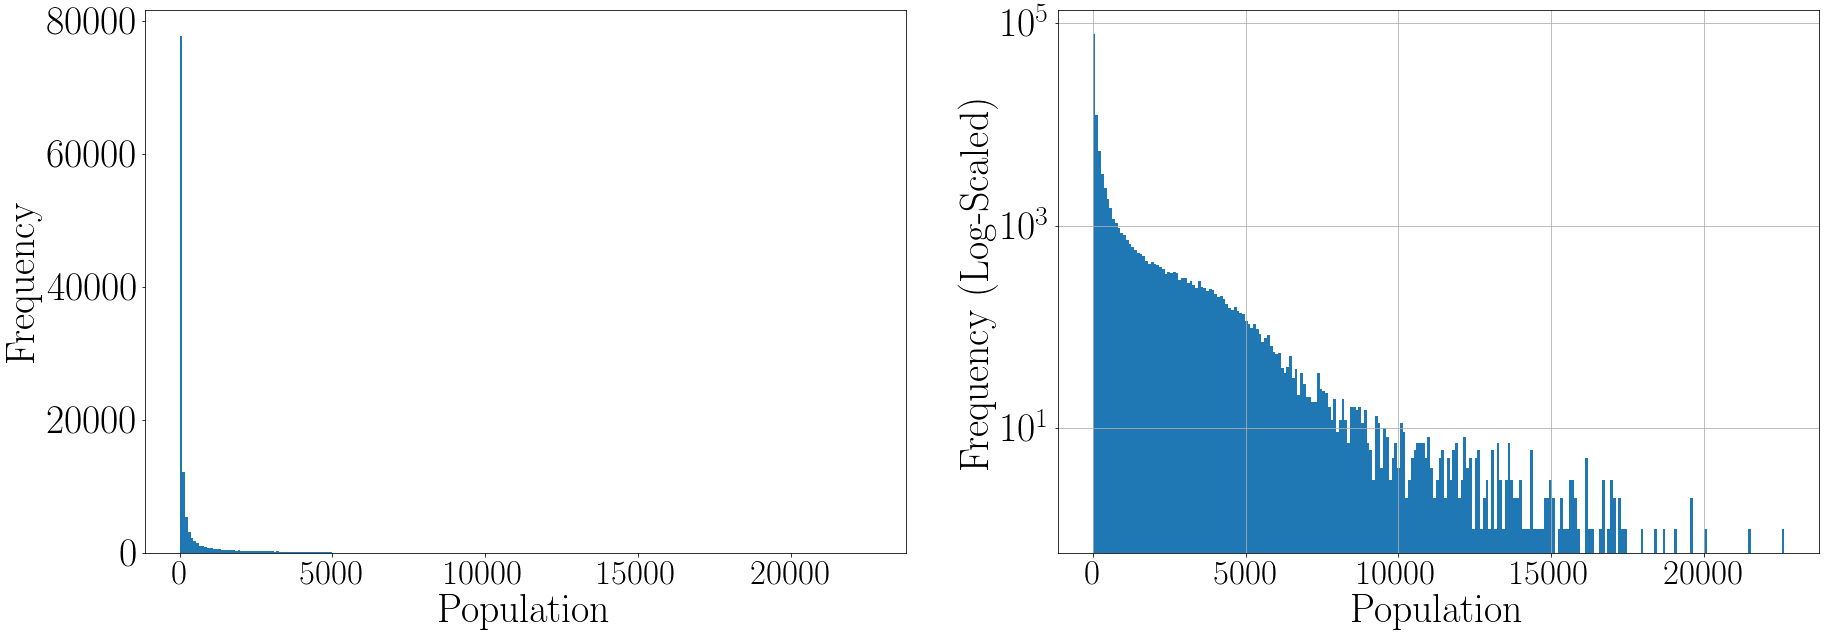

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(30,10))
axs[0].hist(np.sort(UKPopData_clean[UKPopData_clean!=0]), bins=250)
axs[0].set_ylabel('Frequency')
axs[1].hist(np.sort(UKPopData_clean[UKPopData_clean!=0]), bins=250)
axs[1].set_yscale('log')
axs[1].set_ylabel('Frequency (Log-Scaled)')
for ax in axs:
  ax.set_xlabel('Population')
plt.grid(True)
plt.show()

# Earth Engine (Image Collection)

In [ ]:
# Earth Engine Username
USER_NAME = 'rdrozdz'

# Cloud Storage bucket:
OUTPUT_BUCKET = 'rydrozdz-da-dissertation'

# Use Landsat 8 surface reflectance data for predictors.
L7SR = ee.ImageCollection("LANDSAT/LE07/C01/T1_SR")

# Use these bands for prediction.
BANDS = ['B1','B2', 'B3', 'B4', 'B5', 'B6', 'B7']

In [ ]:
# Training Areas of Interest
training_aoi1 = ee.Geometry.Polygon([
                                         [-3.2169677734375135,53.10619396315857],
                                         [-1.1735107421875135,53.10619396315857],
                                         [-1.1735107421875135,53.96154716625702],
                                         [-3.2169677734375135,53.96154716625702],
                                         [-3.2169677734375135,53.10619396315857]
])

training_aoi2 = ee.Geometry.Polygon([
                                         [-2.3329123873445257,51.98611839498167],
                                         [-0.32241434046952566,51.98611839498167],
                                         [-0.32241434046952566,52.813938367312744],
                                         [-2.3329123873445257,52.813938367312744],
                                         [-2.3329123873445257,51.98611839498167]
])

training_aoi3 = ee.Geometry.Polygon([
                                     [-1.426275809826727,50.974825089810984],
                                     [0.47435895579827303,50.974825089810984],
                                     [0.47435895579827303,51.77630428377912],
                                     [-1.426275809826727,51.77630428377912],
                                     [-1.426275809826727,50.974825089810984]
])

# Testing Areas of Interest
testing_aoi1 = ee.Geometry.Polygon([
                                         [-2.8379394531250135,51.112453813092955],
                                         [-2.0469238281250135,51.112453813092955],
                                         [-2.0469238281250135,51.60638373523062],
                                         [-2.8379394531250135,51.60638373523062],
                                         [-2.8379394531250135,51.112453813092955]
])

testing_aoi2 = ee.Geometry.Polygon([
                                    
                                    [-4.600435294153502,55.59919425178578],
                                    [-3.012910880091002,55.59919425178578],
                                    [-3.012910880091002,56.066566112028426],
                                    [-4.600435294153502,56.066566112028426],
                                    [-4.600435294153502,55.59919425178578]
])

In [ ]:
def maskL7sr(image):
  """Google Earth Engine provided Function to mask clouds based on the pixel_qa
  band of Landsat SR data.
  """
  cloudShadowBitMask = ee.Number(2).pow(3).int()
  cloudsBitMask = ee.Number(2).pow(5).int() and ee.Number(2).pow(7).int()
  qa = image.select('pixel_qa')
  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0).And(
      qa.bitwiseAnd(cloudsBitMask).eq(0))
  mask2 = image.mask().reduce(ee.Reducer.min())
  return image.updateMask(mask).updateMask(mask2).select(BANDS)

In [ ]:
def display_all(area_of_interest_list):
  """Given an area of interest (Polygon or MultiPolygon), get the image and
  labels for that area and create interactive map.
  
  Returns Map, image, label_data
  """

  # The image input data is a 2011 cloud-masked median composite.
  image = L7SR.filterDate('2009-01-01', '2011-12-31').map(maskL7sr).median()

  images = []
  for aoi in area_of_interest_list:
    image_clip = image.clip(aoi)
    images.append(image_clip)
  
  # Use folium to visualize the imagery.
  centre = area_of_interest_list[0].centroid()
  centre1 = centre.getInfo()['coordinates'][0]
  centre2 = centre.getInfo()['coordinates'][1]
  Map = folium.Map(location=[centre2, centre1], zoom_start=8)

  for i, im in enumerate(images):
    Map.addLayer(
        ee_object=im, 
        vis_params={'bands': ['B3', 'B2', 'B1'], 'min': 0, 'max': 3000, 'gamma':1.4},
        name='Image'+str(i)
                )
  return Map

In [ ]:
display_all([training_aoi1, training_aoi2, training_aoi3, testing_aoi1, testing_aoi2])

In [ ]:
def display_map(area_of_interest):
  """Given an area of interest (Polygon or MultiPolygon), get the image and
  labels for that area and create interactive map.
  
  Returns Map, image, label_data
  """
  # Label data
  label_data = ee.FeatureCollection('users/rdrozdz/UKPopulationVector2').filterBounds(area_of_interest)

  # The image input data is a 2011 cloud-masked median composite.
  image = L7SR.filterDate('2009-01-01', '2011-12-31').map(maskL7sr).median()
  image = image.clip(area_of_interest)

  empty = ee.Image().byte();

  outline = empty.paint(
    featureCollection = label_data,
    color = 1,
    width = 0.1)

  # Use folium to visualize the imagery.
  centre = area_of_interest.centroid()
  centre1 = centre.getInfo()['coordinates'][0]
  centre2 = centre.getInfo()['coordinates'][1]
  Map = folium.Map(location=[centre2, centre1], zoom_start=8)

  Map.addLayer(
      ee_object=image, 
      vis_params={'bands': ['B3', 'B2', 'B1'], 'min': 0, 'max': 3000, 'gamma':1.4},
      name='Sentinel'
              )
  #Map.addLayer(label_data, {}, 'Population')
  Map.addLayer(
      ee_object=outline,
      vis_params={"palette": 'FF0000'},
      name='edges'
      )

  return Map, image, label_data

In [ ]:
# Create Maps and define bounded images and labels for download
map_tr1, training_image1, training_labels1 = display_map(training_aoi1)
map_tr2, training_image2, training_labels2 = display_map(training_aoi2)
map_tr3, training_image3, training_labels3 = display_map(training_aoi3)
map_tst1, testing_image1, testing_labels1 = display_map(testing_aoi1)
map_tst2, testing_image2, testing_labels2 = display_map(testing_aoi2)

In [ ]:
map_tr1

In [ ]:
map_tr2

In [ ]:
map_tr3

In [ ]:
map_tst1

In [ ]:
map_tst2

In [ ]:
vis_params_thumb_tr1 = {'bands': ['B3', 'B2', 'B1'], 'min': 0, 'max': 3000, 'gamma':1.4, 'region':training_aoi1, 'dimensions':(734,517)}
vis_params_thumb_tr2 = {'bands': ['B3', 'B2', 'B1'], 'min': 0, 'max': 3000, 'gamma':1.4, 'region':training_aoi2, 'dimensions':(727,489)}
vis_params_thumb_tr3 = {'bands': ['B3', 'B2', 'B1'], 'min': 0, 'max': 3000, 'gamma':1.4, 'region':training_aoi3, 'dimensions':(int(1711/2),int(1149/2))}
vis_params_thumb_tst1 = {'bands': ['B3', 'B2', 'B1'], 'min': 0, 'max': 3000, 'gamma':1.4, 'region':testing_aoi1, 'dimensions':(569, 569)}
vis_params_thumb_tst2 = {'bands': ['B3', 'B2', 'B1'], 'min': 0, 'max': 3000, 'gamma':1.4, 'region':testing_aoi2, 'dimensions':(1428, 738)}

print("Training Image 1")
print(training_image1.getThumbURL(params=vis_params_thumb_tr1))
print("Training Image 2")
print(training_image2.getThumbURL(params=vis_params_thumb_tr2))
print("Training Image 3")
print(training_image3.getThumbURL(params=vis_params_thumb_tr3))
print("Testing Image 1")
print(testing_image1.getThumbURL(params=vis_params_thumb_tst1))
print("Testing Image 2")
print(testing_image2.getThumbURL(params=vis_params_thumb_tst2))

Training Image 1
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/2e6a0ea70c4ddb476018c03e7a637a8d-ace0ba1678a22d0bfe8f19618b36726f:getPixels
Training Image 2
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/a9da7dcb1175fcd49712a52383b38f18-c397714abca23c392e2c853ec646c132:getPixels
Training Image 3
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/3e4bf51f2865f41c07a2fae142f78268-2f43f0989b87eb9b1b105edc6fdd7d55:getPixels
Testing Image 1
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/0946f91ede582f3788df3cf47aee6adc-8cf5388201112e6f3bc4dae98372118a:getPixels
Testing Image 2
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/1cb5ab2d17939ef196f5f3458c62714b-39c88b703f26673181377fc9319faabd:getPixels


In [ ]:
print("Training Image 1 Area")
print(str(training_aoi1.area().getInfo()/(1000 * 1000))+" km^2")
print("Training Image 2 Area")
print(str(training_aoi2.area().getInfo()/(1000 * 1000))+" km^2")
print("Training Image 3 Area")
print(str(training_aoi3.area().getInfo()/(1000 * 1000))+" km^2")
print("Testing Image 1 Area")
print(str(testing_aoi1.area().getInfo()/(1000 * 1000))+" km^2")
print("Testing Image 2 Area")
print(str(testing_aoi2.area().getInfo()/(1000 * 1000))+" km^2")

Training Image 1 Area
12843.252670492728 km^2
Training Image 2 Area
12554.523626201188 km^2
Training Image 3 Area
11755.954694711087 km^2
Testing Image 1 Area
3016.4774180923255 km^2
Testing Image 2 Area
5151.778738534205 km^2


In [ ]:
num_samples_tr1 = training_labels1.aggregate_count('Population').getInfo()
num_samples_tr2 = training_labels2.aggregate_count('Population').getInfo()
num_samples_tr3 = training_labels3.aggregate_count('Population').getInfo()
num_samples_tst1 = testing_labels1.aggregate_count('Population').getInfo()
num_samples_tst2 = testing_labels2.aggregate_count('Population').getInfo()

print("""
Number of samples (Clipped Image with Population Label) in each image
=====================================================================
Training Set 1: {}
Training Set 2: {}
Training Set 3: {}
=====================================================================
Total Training Samples {}
=====================================================================
Testing Set 1: {}
Testing Set 2: {}
=====================================================================
Total Testing Samples: {}
=====================================================================
""".format(num_samples_tr1, num_samples_tr2, num_samples_tr3, num_samples_tr1+num_samples_tr2+num_samples_tr3, num_samples_tst1, num_samples_tst2, num_samples_tst1 + num_samples_tst2))


Number of samples (Clipped Image with Population Label) in each image
Training Set 1: 13158
Training Set 2: 12813
Training Set 3: 12023
Total Training Samples 37994
Testing Set 1: 3125
Testing Set 2: 5325
Total Testing Samples: 8450



# Downloading Training Images/Labels











In [ ]:
for i, image in enumerate([training_image1, training_image2]):
  task = ee.batch.Export.image.toDrive(
      image=image,
      folder='gdrive/My Drive/Dissertation Files/Export',
      description='Train Set {}'.format(i),
      fileFormat='GeoTIFF',
      scale=30
  )
  task.start()

for i, label in enumerate([training_labels1, training_labels2]):
    task = ee.batch.Export.table.toDrive(
      collection=label,
      description='Train Set {}'.format(i),
      folder='gdrive/My Drive/Dissertation Files/Export',
      fileFormat="SHP", 
  )
    task.start()


In [ ]:
for i, image in enumerate([training_image3]):
  task = ee.batch.Export.image.toDrive(
      image=image,
      folder='gdrive/My Drive/Dissertation Files/Export',
      description='Train Set {}'.format(i),
      fileFormat='GeoTIFF',
      scale=30
  )
  task.start()

for i, label in enumerate([training_labels3]):
    task = ee.batch.Export.table.toDrive(
      collection=label,
      description='Train Set {}'.format(i),
      folder='gdrive/My Drive/Dissertation Files/Export',
      fileFormat="SHP", 
  )
    task.start()

# Downloading Test Images/Labels

In [ ]:
for i, image in enumerate([testing_image1]):
  task = ee.batch.Export.image.toDrive(
      image=image,
      folder='gdrive/My Drive/Dissertation Files/Export',
      description='Test Set {}'.format(i),
      fileFormat='GeoTIFF',
      scale=30
  )
  task.start()

for i, label in enumerate([testing_labels1]):
    task = ee.batch.Export.table.toDrive(
      collection=label,
      description='Test Set {}'.format(i),
      folder='gdrive/My Drive/Dissertation Files/Export',
      fileFormat="SHP", 
  )
    task.start()

In [ ]:
for i, image in enumerate([testing_image2]):
  task = ee.batch.Export.image.toDrive(
      image=image,
      folder='gdrive/My Drive/Dissertation Files/Export',
      description='Test Set {}'.format(i),
      fileFormat='GeoTIFF',
      scale=30
  )
  task.start()

for i, label in enumerate([testing_labels2]):
    task = ee.batch.Export.table.toDrive(
      collection=label,
      description='Test Set {}'.format(i),
      folder='gdrive/My Drive/Dissertation Files/Export',
      fileFormat="SHP", 
  )
    task.start()